In [255]:
#IoT for Smart Irrigation
#Yithzak Alarcon - Marcela Arrieta
#Obtaining Weather Forecasting

#Importing libraries and json
import requests
import json
import numpy as np
#Base URL with Latitude and Longitude (Monteria)
base_url = "https://api.openweathermap.org/data/2.5/onecall?lat=10.25&lon=-75.333&exclude=minutely&units=metric&appid=157b7fb9c5a06acf2955e6740bc326b7"
#HTTP Request
response = requests.get(base_url)
#Checking the status of the request
if response.status_code == 200:
    #Getting data in JSON format
    data = response.json()
    #Weather frequency report
    data2 = json.loads(response.content)
    report_hourly = data['hourly']
    report_daily = data['daily']
    data_long = len(report_hourly)
    humidity_fc = np.zeros(data_long, dtype='int')
    temperature_fc = np.zeros(data_long)
    precipitation_prob = np.zeros(data_long)
    precipitation_mm = np.zeros(data_long)
    hours = np.arange(0, data_long, 1)
    for i in range(0, data_long):
        humidity_fc[i] = report_hourly[i]['humidity']
        temperature_fc[i] = report_hourly[i]['temp']
        precipitation_mm[i] = report_daily[(0+bool(i>=24))]['rain']
        precipitation_prob[i] = report_hourly[i]['pop']*100
    #print(humidity_fc, "\n", temperature_fc, "\n", precipitation_fc)
else:
    #Showing error message
    print("Error in the request")

In [256]:
#Import libraries for Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as pl
%matplotlib notebook

#Objects universe variables and membership
#Functions
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
Temperature = ctrl.Antecedent(np.arange(0, 53 , 1), 'Temperature')
Precipitation_prob = ctrl.Antecedent(np.arange(0, 120, 1), 'Precipitation Probability')
Precipitation_mm = ctrl.Antecedent(np.arange(0, 20, 0.01), 'Precipitation Volume')

SoilHumRef = ctrl.Consequent(np.arange(0, 101, 1), 'Soil Humidity Reference')

<IPython.core.display.Javascript object>


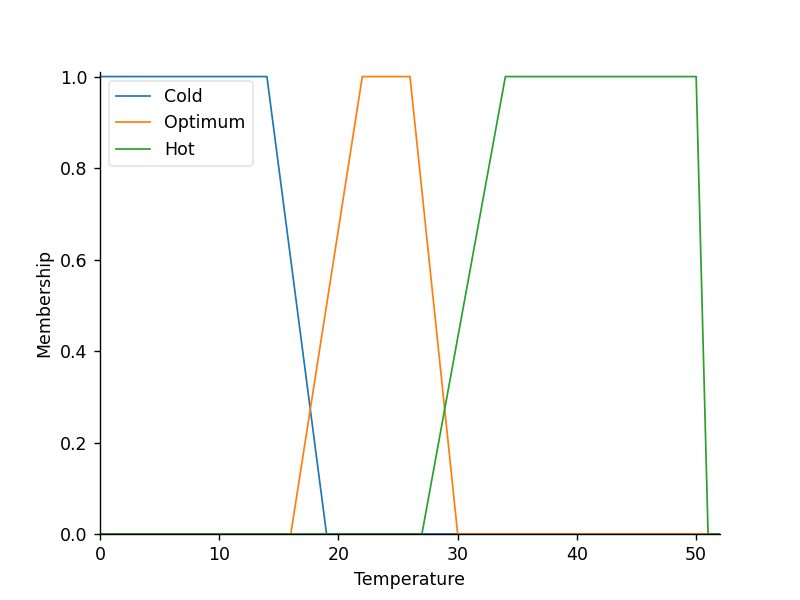

In [257]:
#Custom temperature membership functions
Temperature['Cold'] = fuzz.trapmf(Temperature.universe,[0, 0, 14, 19])
Temperature['Optimum'] = fuzz.trapmf(Temperature.universe,[16, 22, 26, 30])
Temperature['Hot'] = fuzz.trapmf(Temperature.universe,[27, 34, 50, 50])

#Temperature view
Temperature.view()

<IPython.core.display.Javascript object>


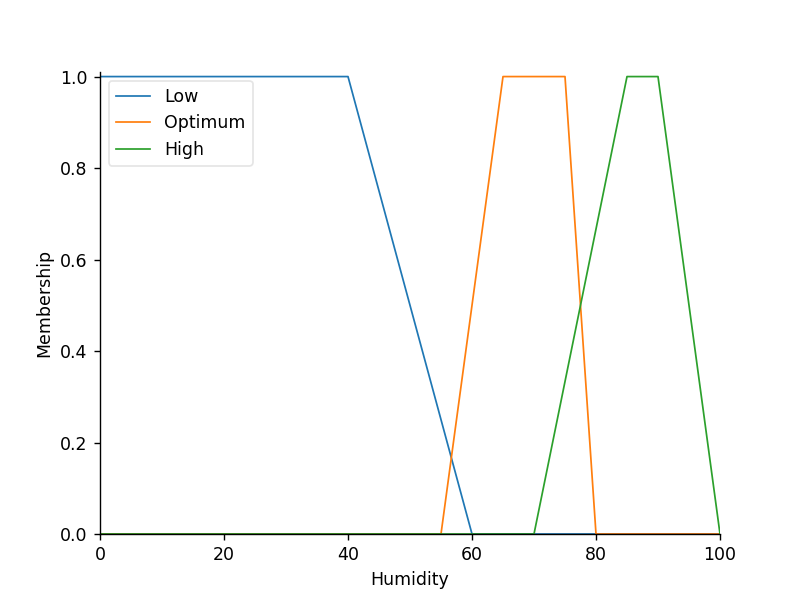

In [258]:
#Custom humidity membership functions
Humidity['Low'] = fuzz.trapmf(Humidity.universe, [0, 0, 40, 60])
Humidity['Optimum'] = fuzz.trapmf(Humidity.universe, [55, 65, 75, 80])
Humidity['High'] = fuzz.trapmf(Humidity.universe, [70, 85, 90, 100])

#Humidity view
Humidity.view()

<IPython.core.display.Javascript object>


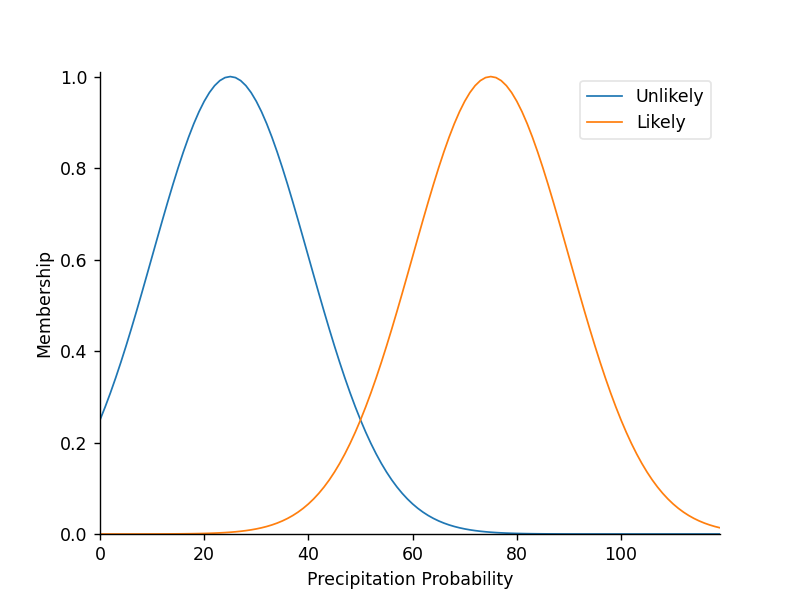

In [259]:
#Custom precipitation probability membership functions
Precipitation_prob['Unlikely'] = fuzz.gaussmf(Precipitation_prob.universe, 25, 15)
Precipitation_prob['Likely'] = fuzz.gaussmf(Precipitation_prob.universe, 75, 15)
#Precipitation probability view
Precipitation_prob.view()

<IPython.core.display.Javascript object>


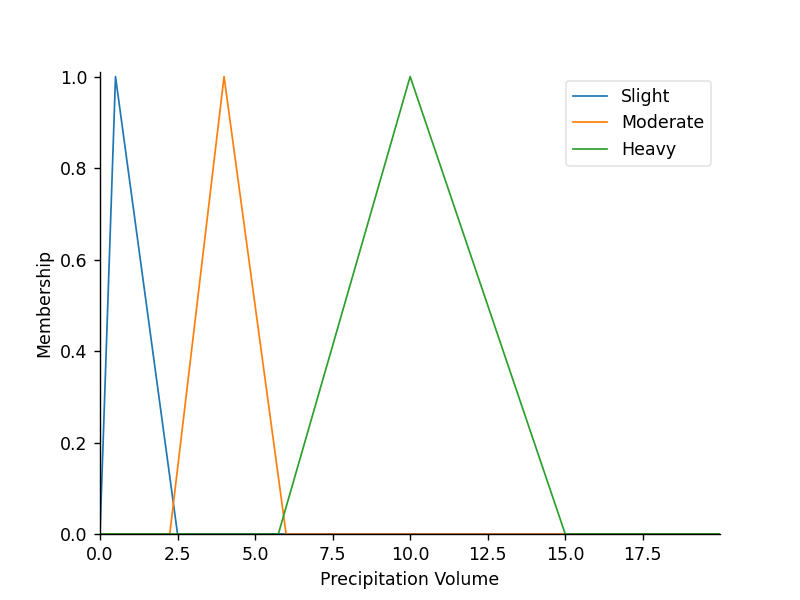

In [260]:
#Custom precipitation probability membership functions
Precipitation_mm['Slight'] = fuzz.trimf(Precipitation_mm.universe, [0, 0.5, 2.5])
Precipitation_mm['Moderate'] = fuzz.trimf(Precipitation_mm.universe, [2.25, 4, 6])
Precipitation_mm['Heavy'] = fuzz.trimf(Precipitation_mm.universe, [5.75, 10, 15])
#Precipitation volume view
Precipitation_mm.view()

<IPython.core.display.Javascript object>


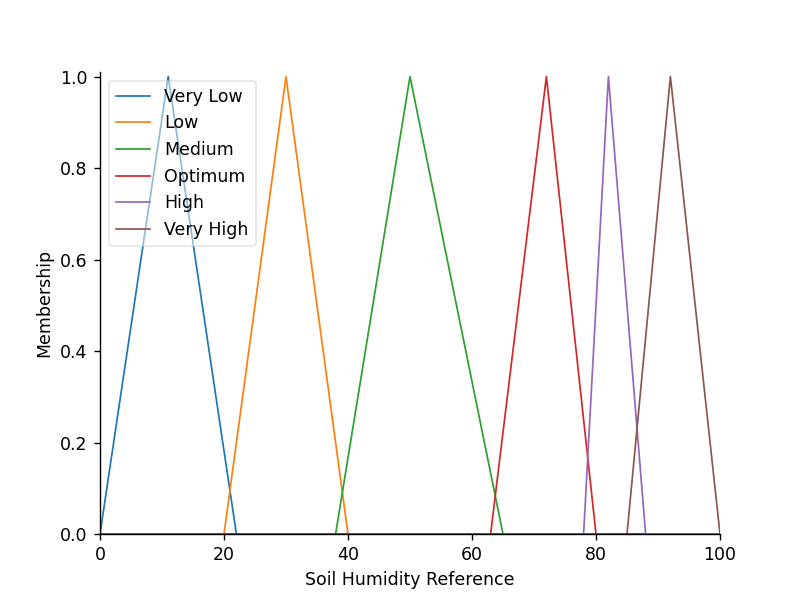

In [261]:
#Custom Soil Humidity Reference membership functions
SoilHumRef['Very Low'] = fuzz.trimf(SoilHumRef.universe, [0, 11, 22])
SoilHumRef['Low'] = fuzz.trimf(SoilHumRef.universe, [20, 30, 40])
SoilHumRef['Medium'] = fuzz.trimf(SoilHumRef.universe, [38, 50, 65])
SoilHumRef['Optimum'] = fuzz.trimf(SoilHumRef.universe, [63, 72, 80])
SoilHumRef['High'] = fuzz.trimf(SoilHumRef.universe, [78, 82, 88])
SoilHumRef['Very High'] = fuzz.trimf(SoilHumRef.universe, [85, 92, 100])

#Soil Humidity Reference view
SoilHumRef.view()

In [262]:
#Rules for input variables universe
Rule1 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule2 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Medium'])
Rule3 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Optimum'])
Rule4 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule5 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule6 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Medium'])
Rule7 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Very Low'])
Rule8 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule9 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Slight'], SoilHumRef['Medium'])
Rule10 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule11 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Optimum'])
Rule12 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Optimum'])
Rule13 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule14 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Medium'])
Rule15 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Optimum'])
Rule16 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Very Low'])
Rule17 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule18 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Moderate'], SoilHumRef['Medium'])
Rule19 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule20 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['High'])
Rule21 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Very High'])
Rule22 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Medium'])
Rule23 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule24 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['High'])
Rule25 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Medium'])
Rule26 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule27 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Likely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule28 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Very Low'])
Rule29 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule30 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Medium'])
Rule31 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Very Low'])
Rule32 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule33 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule34 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Very Low'])
Rule35 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Very Low'])
Rule36 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Slight'], SoilHumRef['Low'])
Rule37 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule38 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Medium'])
Rule39 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Optimum'])
Rule40 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule41 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule42 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Medium'])
Rule43 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Very Low'])
Rule44 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Very Low'])
Rule45 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Moderate'], SoilHumRef['Low'])
Rule46 = ctrl.Rule(Humidity['Low'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Low'])
Rule47 = ctrl.Rule(Humidity['Optimum'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule48 = ctrl.Rule(Humidity['High'] & Temperature['Cold'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Optimum'])
Rule49 = ctrl.Rule(Humidity['Low'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Very Low'])
Rule50 = ctrl.Rule(Humidity['Optimum'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Medium'])
Rule51 = ctrl.Rule(Humidity['High'] & Temperature['Optimum'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Medium'])
Rule52 = ctrl.Rule(Humidity['Low'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Very Low'])
Rule53 = ctrl.Rule(Humidity['Optimum'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Low'])
Rule54 = ctrl.Rule(Humidity['High'] & Temperature['Hot'] & Precipitation_prob['Unlikely'] & Precipitation_mm['Heavy'], SoilHumRef['Medium'])

#Rule1.view()

In [263]:
Command_control = ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9,Rule10,Rule11,Rule12,Rule13,Rule14,Rule15,Rule16,Rule17,Rule18,Rule19,Rule20,Rule21,Rule22,Rule23,Rule24,Rule25,Rule26,Rule27,Rule28,Rule29,Rule30,Rule31,Rule32,Rule33,Rule34,Rule35,Rule36,Rule37,Rule38,Rule39,Rule40,Rule41,Rule42,Rule43,Rule44,Rule45,Rule46,Rule47,Rule48,Rule49,Rule50,Rule51,Rule52,Rule53,Rule54]) 
SoilHumDecision = ctrl.ControlSystemSimulation(Command_control)

In [264]:
Z = np.zeros(data_long)

for i in range(0, data_long):
    SoilHumDecision.input['Temperature'] = temperature_fc[i]
    SoilHumDecision.input['Humidity'] = humidity_fc[i]
    SoilHumDecision.input['Precipitation Volume'] = precipitation_mm[i]
    SoilHumDecision.input['Precipitation Probability'] = precipitation_prob[i]
    # Crunch the numbers
    SoilHumDecision.compute()
    Z[i] = SoilHumDecision.output['Soil Humidity Reference']

In [265]:
#Last decision computed
print("Temperature:", temperature_fc[data_long-1], "\nHumidity:", humidity_fc[data_long-1], "\nPrecipitation Probability:", precipitation_prob[data_long-1], "\nPrecipitation Volume:", precipitation_mm[data_long-1])

Temperature: 27.56 
Humidity: 81 
Precipitation Probability: 73.0 
Precipitation Volume: 7.82


Soil Humidity Reference: 78.976 %


<IPython.core.display.Javascript object>


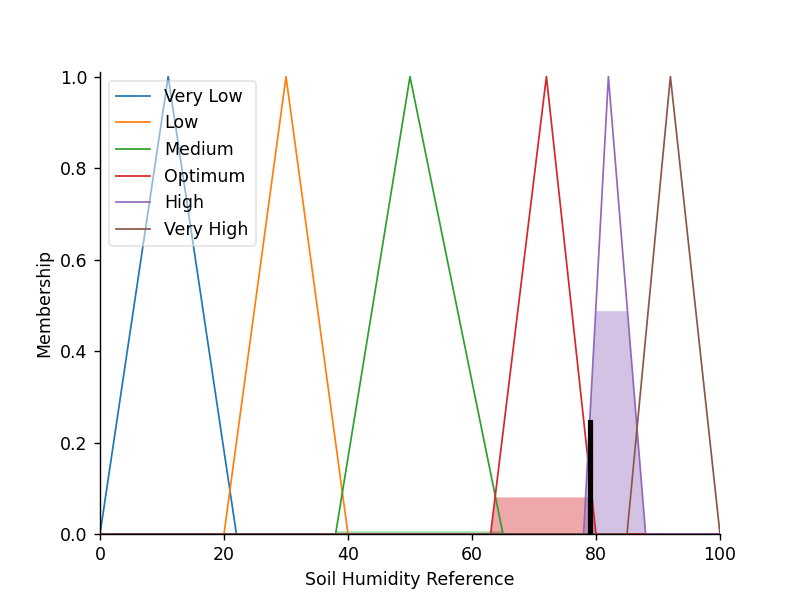

In [266]:
print("Soil Humidity Reference: %.3f" %SoilHumDecision.output['Soil Humidity Reference'], "%")
SoilHumRef.view(sim=SoilHumDecision)

<IPython.core.display.Javascript object>


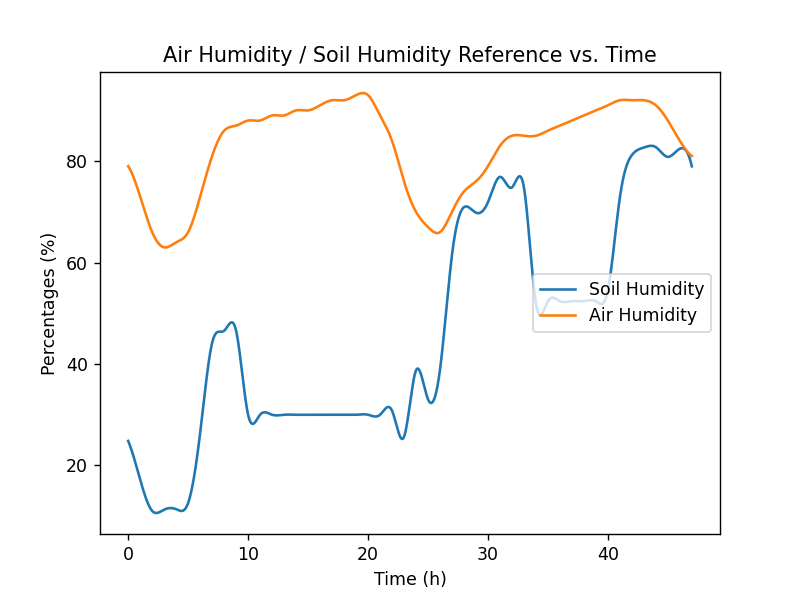

<IPython.core.display.Javascript object>


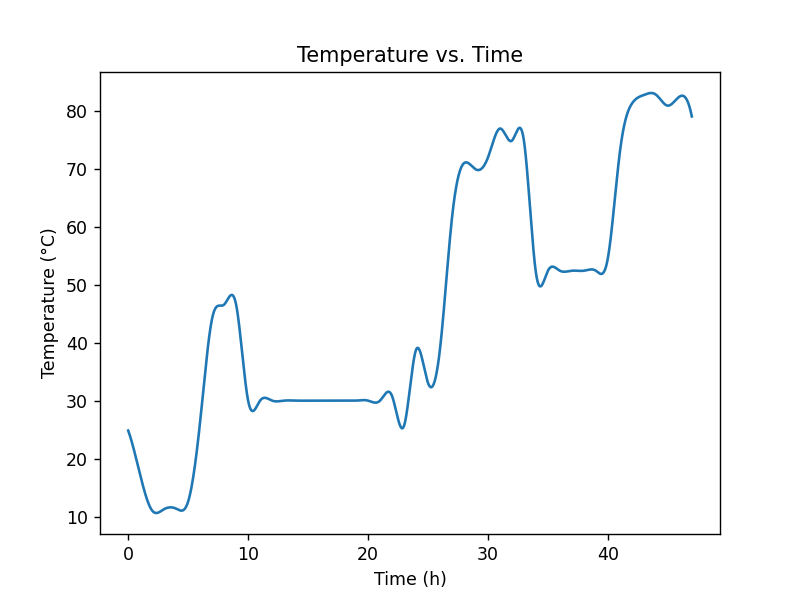

<IPython.core.display.Javascript object>


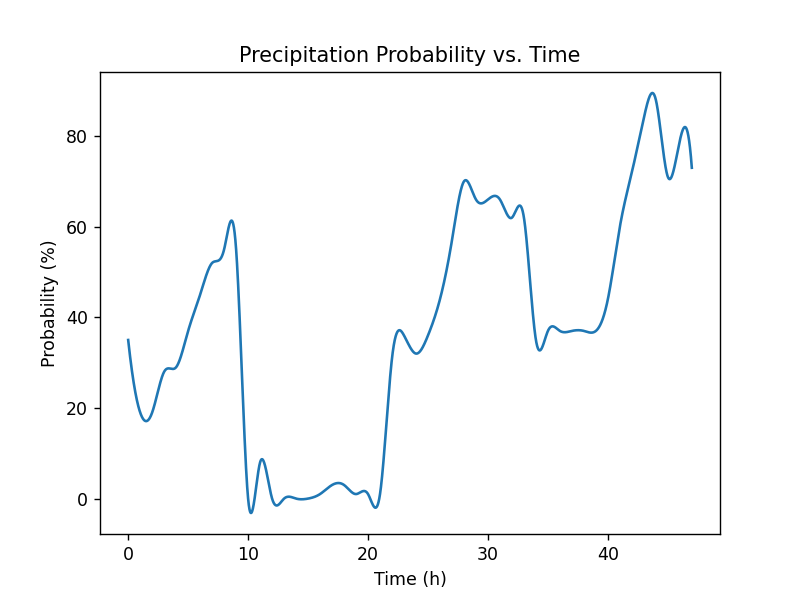

In [267]:
from scipy.interpolate import BSpline, make_interp_spline

hours_spline = np.linspace(0, 47, 10000)
Hspline = make_interp_spline(hours, Z)
Z_new = Hspline(hours_spline)
Hspline1 = make_interp_spline(hours, temperature_fc)
temperature_new = Hspline(hours_spline)
Hspline2 = make_interp_spline(hours, humidity_fc)
humidity_new = Hspline2(hours_spline)
Hspline3 = make_interp_spline(hours, precipitation_prob)
precipitation_new = Hspline3(hours_spline)
plt.figure()
plt.plot(hours_spline, Z_new, hours_spline, humidity_new)
plt.legend(('Soil Humidity', 'Air Humidity'), loc='center right')
plt.title('Air Humidity / Soil Humidity Reference vs. Time')
plt.xlabel('Time (h)')
plt.ylabel('Percentages (%)')
plt.figure()
plt.plot(hours_spline, temperature_new)
plt.title('Temperature vs. Time')
plt.xlabel('Time (h)')
plt.ylabel('Temperature (°C)')
plt.figure()
plt.plot(hours_spline, precipitation_new)
plt.title('Precipitation Probability vs. Time')
plt.xlabel('Time (h)')
plt.ylabel('Probability (%)')
plt.show()

<IPython.core.display.Javascript object>


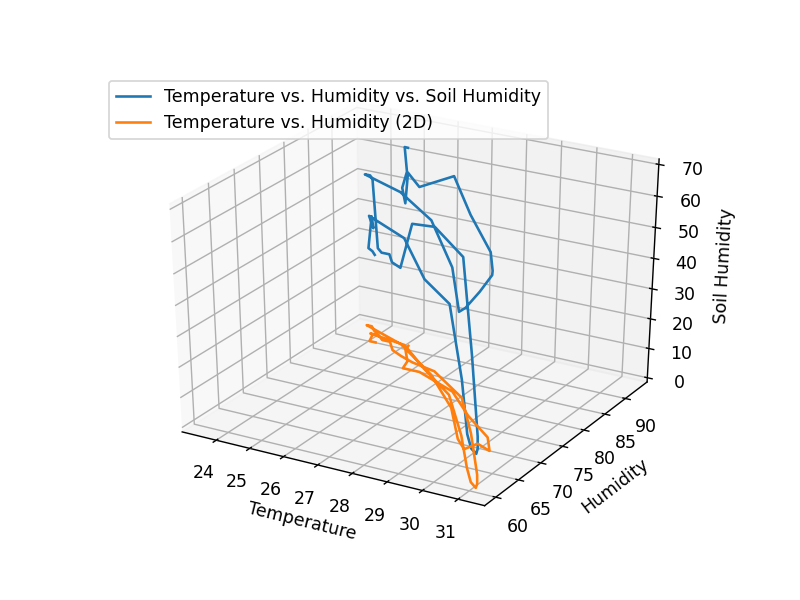

In [251]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(temperature_fc, humidity_fc, Z, label='Temperature vs. Humidity vs. Soil Humidity')
ax.plot(temperature_fc, humidity_fc, zdir='z', label='Temperature vs. Humidity (2D)')
ax.legend(loc='upper left')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Soil Humidity')
plt.show()

<IPython.core.display.Javascript object>


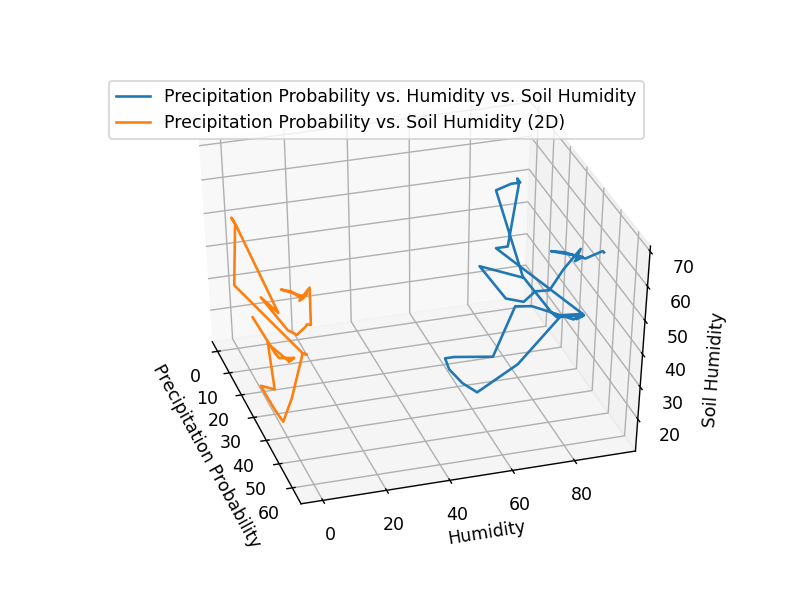

In [254]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(precipitation_prob, humidity_fc, Z, label='Precipitation Probability vs. Humidity vs. Soil Humidity')
ax.plot(precipitation_prob, Z, zdir='y', label='Precipitation Probability vs. Soil Humidity (2D)')
ax.legend(loc='upper left')
ax.set_xlabel('Precipitation Probability')
ax.set_ylabel('Humidity')
ax.set_zlabel('Soil Humidity')
plt.show()

<IPython.core.display.Javascript object>


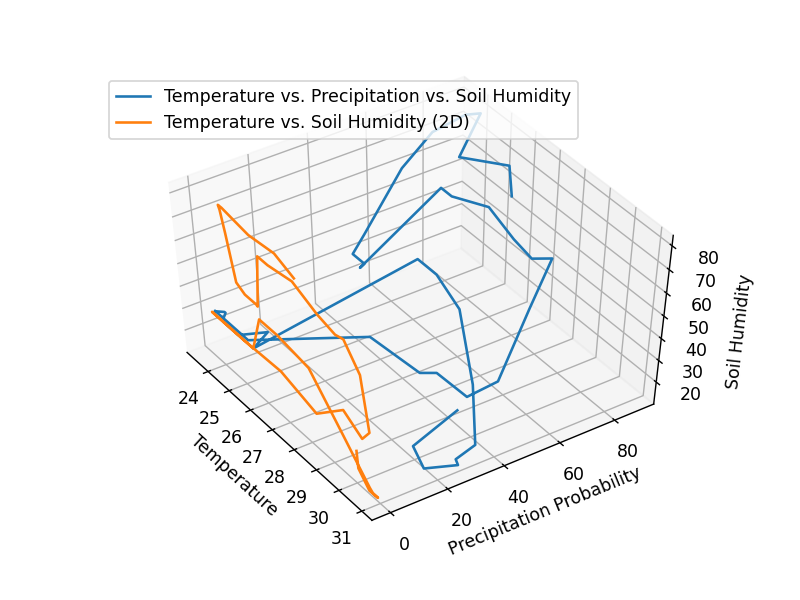

In [268]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(temperature_fc, precipitation_prob, Z, label='Temperature vs. Precipitation vs. Soil Humidity')
ax.plot(temperature_fc, Z, zdir='y', label='Temperature vs. Soil Humidity (2D)')
ax.legend(loc='upper left')
ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation Probability')
ax.set_zlabel('Soil Humidity')
plt.show()

<IPython.core.display.Javascript object>


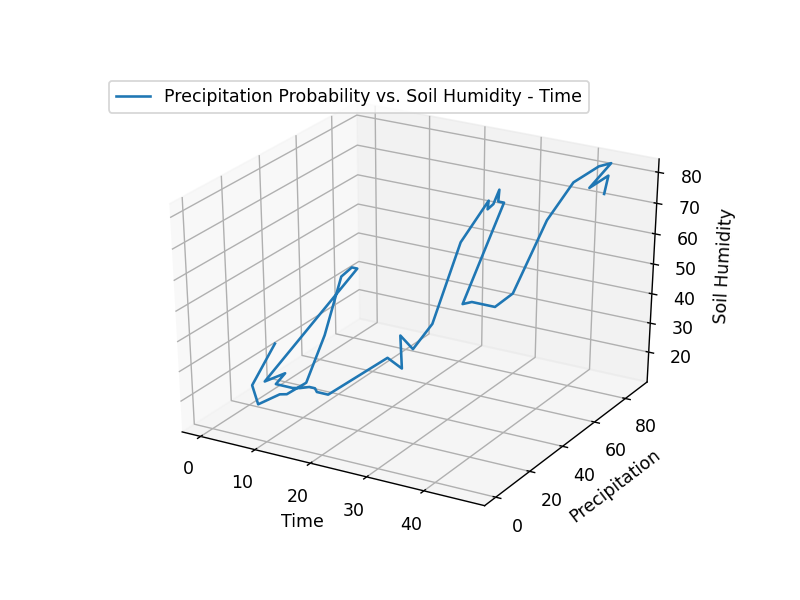

In [269]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(hours, precipitation_prob, Z, label='Precipitation Probability vs. Soil Humidity - Time')
ax.legend(loc='upper left')
ax.set_xlabel('Time')
ax.set_ylabel('Precipitation')
ax.set_zlabel('Soil Humidity')
plt.show()

<IPython.core.display.Javascript object>


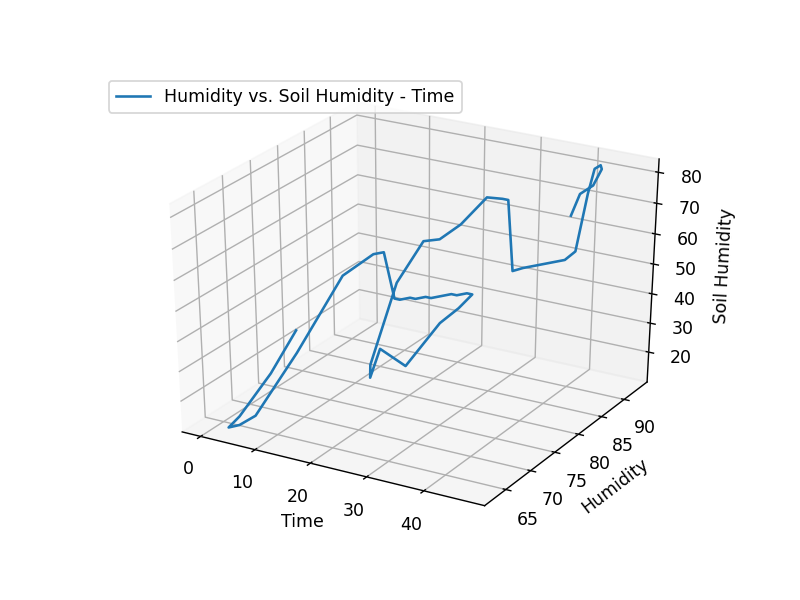

In [270]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(hours, humidity_fc, Z, label='Humidity vs. Soil Humidity - Time')
ax.legend(loc='upper left')
ax.set_xlabel('Time')
ax.set_ylabel('Humidity')
ax.set_zlabel('Soil Humidity')
plt.show()

<IPython.core.display.Javascript object>


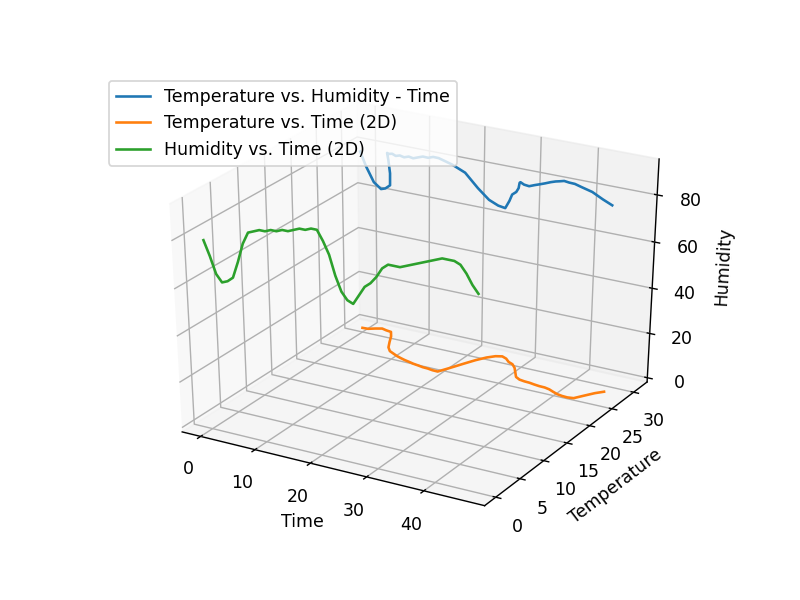

In [271]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(hours, temperature_fc, humidity_fc, label='Temperature vs. Humidity - Time')
ax.plot(hours, temperature_fc, zdir='z', label='Temperature vs. Time (2D)')
ax.plot(hours, humidity_fc, zdir='y', label='Humidity vs. Time (2D)')
ax.legend(loc='upper left')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')
plt.show()